# Calculations of MR in Rhombohedral graphene

## Load packages

In [2]:
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics

In [3]:
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
using StaticArrays
using Parameters
using CairoMakie
using LMC
using JLD2

const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
# add https://github.com/fernandopenaranda/Optics_in_the_length_gauge
# units meV, fs, K

proj_folder = dirname(pwd())
rhomb_folder = proj_folder * "/model/rhombohedral/"
common_folder = proj_folder * "/comfunctions/"
figures_folder = proj_folder * "/Paper/Figures/"

# include(rhomb_folder * "model.jl")
# include(rhomb_folder * "observables.jl")
# include(rhomb_folder * "plotters.jl")
# include(rhomb_folder * "filling.jl")
# include(rhomb_folder * "wrapper_lmc.jl")
# include(rhomb_folder * "spontaneous_sym_breakingmodels.jl")
# include(rhomb_folder * "local_hartree_optimization.jl")
# include(common_folder * "separate_contributions.jl")

"/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figures/"

In [3]:
# using GLMakie

## Calculations

### Presets

In [9]:
a0 = 0.246
μlist = collect(0:0.1:10)
p = Params_rhombohedral(1, 0, 3160, 390,-20, 315, 0*44, 2, 0)
T = 2
B = 10
evals = 10#10000
N = 7
T = 2 #evals 80000 not perfect
τ = 200

200

### Bands

In [63]:
# using CairoMakie
# CairoMakie.disable_mime!("svg", "pdf", "text/html")

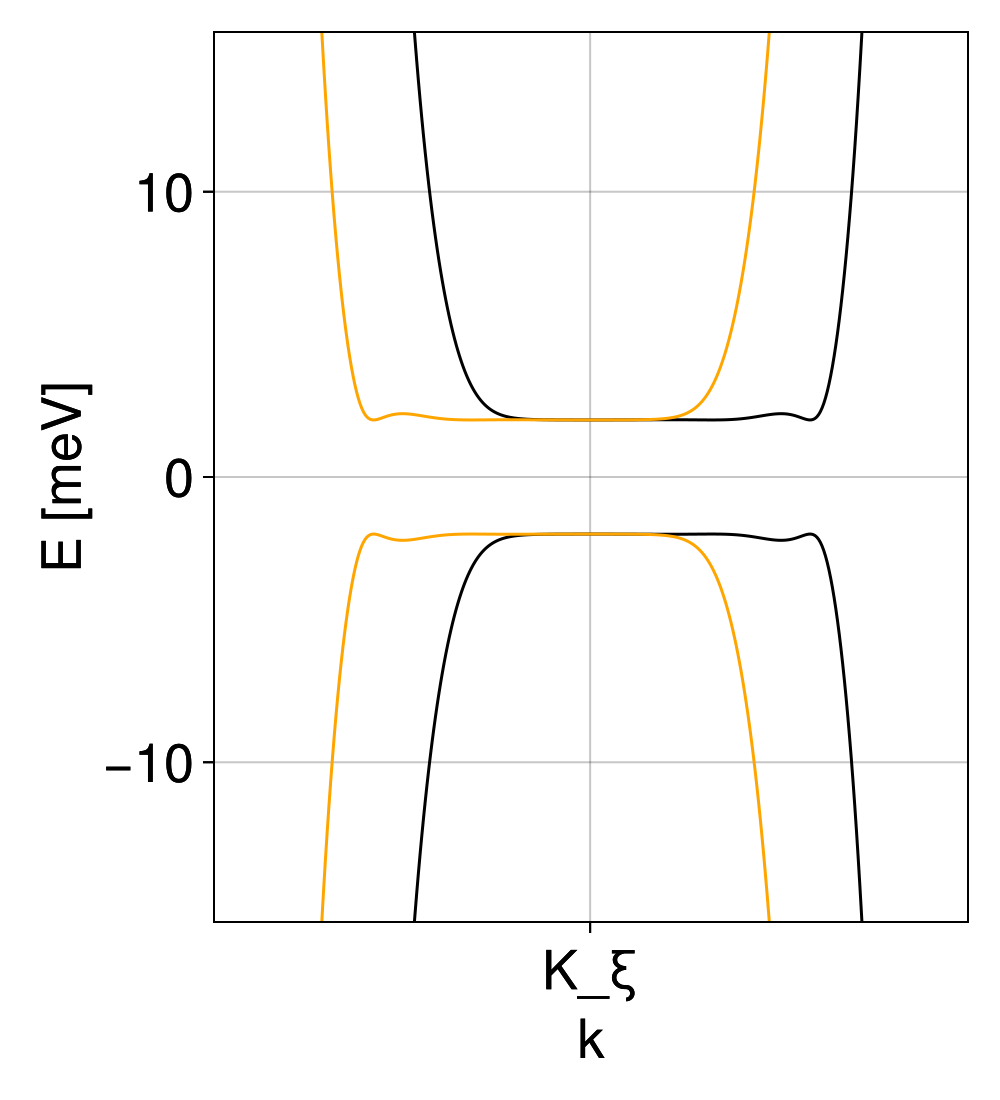

In [12]:
 # number of layers
fig = LMC.abcNplotbandsk(N,200, Params_rhombohedral(p, ξ =1), ylims = [-5,5])
LMC.abcNplotbandsk(fig, N, 200, Params_rhombohedral(p, ξ =-1), ylims = [-5,5])

In [65]:
# using BZpaths
# Rs = ([√3/2,1/2,], [0,1.0])                 # Lattice vectors, can be 2d or 3d
# high_sym_line = [:Γ, :M, :X, :Γ]            # Custom k-path over high symmetry momenta
# sgnum = 17                                 # point group (17 = 2d triangular lattice)
# N = 100                            # points in the k-mesh
# plot_kpath(Rs, sgnum, N)

In [85]:
cnst = p.γ1/(p.γ0 *√3/2)
Δx = [-cnst, cnst] 
Δy = [-cnst, cnst]
A_small = ((Δx[2]-Δx[1])*(Δy[2]-Δy[1]))
A_full = 8π^2/√3
A_small/A_full

6.988508396517154

## Integral observables

In [10]:
lmc_presets(N, μ,ξ, p::Params_rhombohedral; kws...) =  xxx_lmc_presets(N, μ, ξ, p; kws...)
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals, T = T, berry_contribution = true, omm_contribution = true, fermi_surface = false, with_shift = false)
lmcshift_presets(μ,ξ) = xxx_lmc_presets(N, μ, ξ, p; evals = evals, T = T, fermi_surface = false, with_shift = true)

lmcshift_presets (generic function with 1 method)

#### DOS

In [68]:
lmc0p = lmcnoshift_presets(0,1,1e5) #1e6
lmc0n = lmcnoshift_presets(0,-1,1e5) #1e6
evals = 1e5
ω, j = c_dos(lmc0p, μlist, η = 0.1, evals = evals)
ω, j2 = c_dos(lmc0n, μlist, η = 0.1, evals = evals)

([0.0, 2.5e-5, 5.0e-5, 7.5e-5, 0.0001, 0.000125, 0.00015, 0.000175, 0.0002, 0.000225  …  0.006775000000000001, 0.0068, 0.006825, 0.006849999999999999, 0.006875, 0.006900000000000001, 0.006925, 0.0069500000000000004, 0.006974999999999999, 0.007], [2.4169654623509872e17, 2.420313248789245e17, 2.4303912636081434e17, 2.447304253731428e17, 2.471229429284266e17, 2.5024205202243133e17, 2.5412136798932493e17, 2.588035476126833e17, 2.643413304288506e17, 2.7079886720254122e17  …  3.959397532486126e17, 3.9502529713075923e17, 3.926468907452106e17, 3.889275250867808e17, 3.849116479261855e17, 3.816250624181744e17, 3.7953377114650554e17, 3.7833897513315846e17, 3.7706003188572045e17, 3.751961624059574e17])

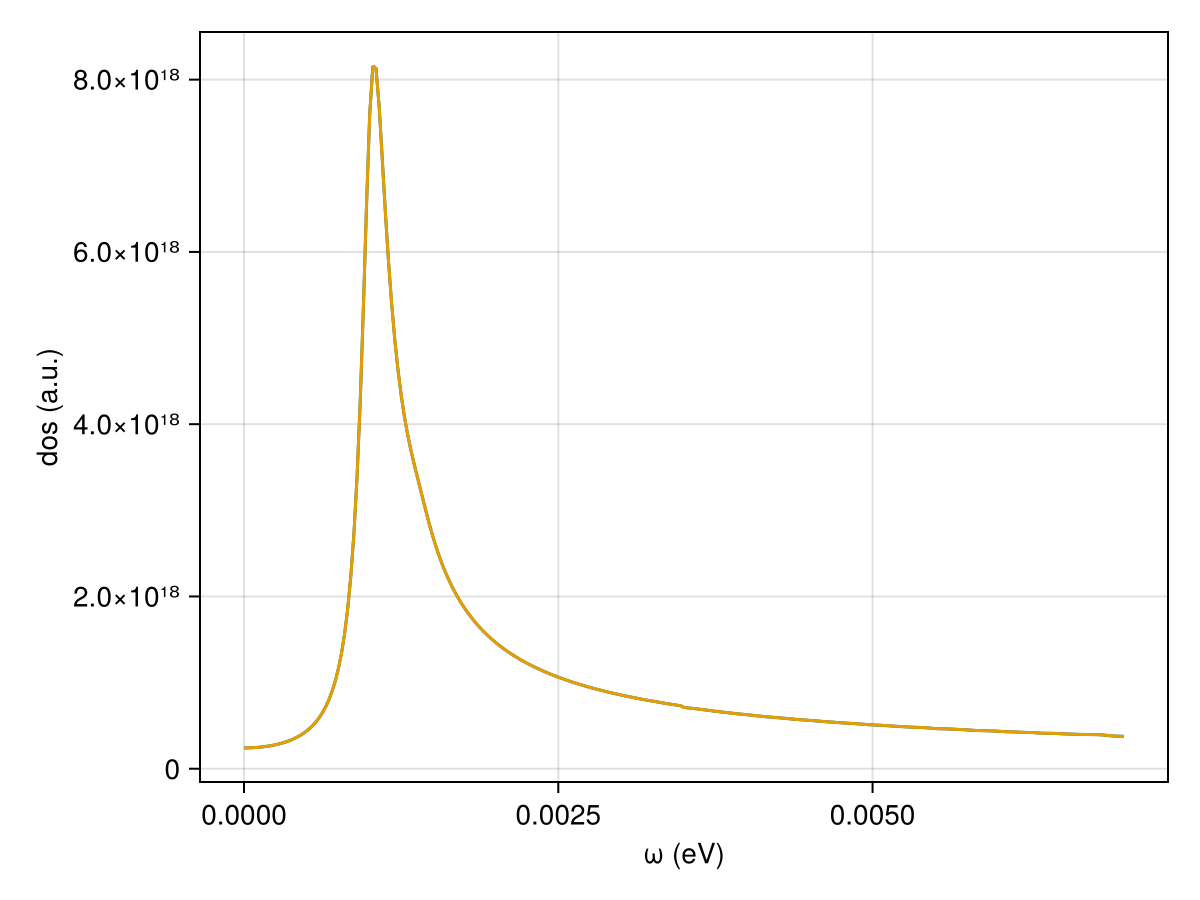

In [69]:
fig = Figure(); ax = Axis(fig[1,1], xlabel = "ω (eV)", ylabel = "dos (a.u.)")
lines!(ax, ω, j)
lines!(ax, ω, j2)
fig

### LMC

In [119]:
T = 5

5

In [123]:
N = 5
evals = 10000
μlist = collect(0:0.25:10);

In [124]:
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
     T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
     fermi_surface = false, with_shift = false)

lmcnoshift_presets (generic function with 2 methods)

In [125]:
lmcpv = [LMC.linear_magneto_conductivity_orbital(lmcnoshift_presets(μ, 1, evals))
     for μ in μlist];
lmcnv = [LMC.linear_magneto_conductivity_orbital(lmcnoshift_presets(μ, -1, evals))
     for μ in μlist];

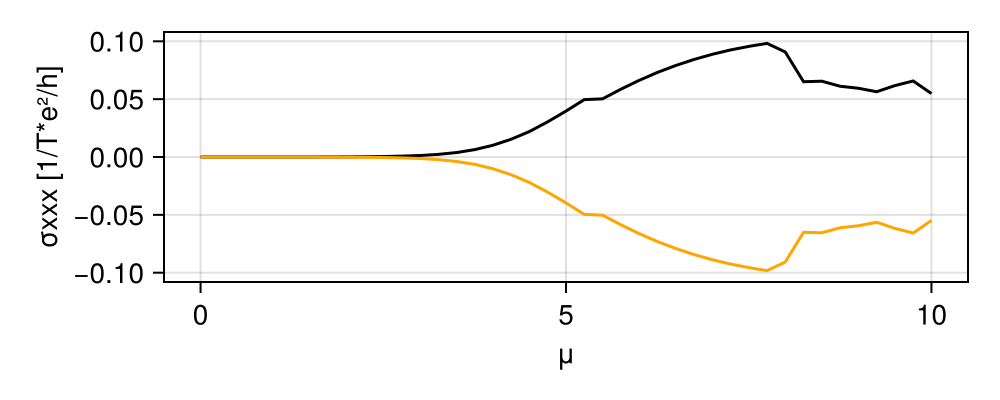

In [126]:

fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
lines!(ax, μlist, -lmcnv, color = :orange)
fig

### Spin magnetic moment

In [26]:

μlist = collect(0:1:10)
lmcpv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(μ, 1, evals))
     for μ in μlist];
lmcnv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(μ, -1, evals))
     for μ in μlist];

lmcps = [linear_magneto_conductivity(Planar_σijk_presets_spin([1I,1I,1I], lmcnoshift_presets(μ, 1, evals))) # both contributions summed up for spin up
     for μ in μlist];
lmcns = [linear_magneto_conductivity(Planar_σijk_presets_spin([1I,1I,1I], lmcnoshift_presets(μ, -1, evals)))# both contributions summed up for spin down
     for μ in μlist];


  3.630884 seconds (106.77 M allocations: 4.750 GiB, 15.67% gc time, 2.58% compilation time: 77% of which was recompilation)


11-element Vector{Float64}:
 -0.00017979758292751893
 -0.004717693479824367
 -0.03398384476572722
 -0.10082074973838973
 -0.12925444740372838
 -0.1076562492490095
 -0.11890038886541657
 -0.08693333567559916
 -0.11450436873400645
 -0.0977327483428037
 -0.025796748984752205

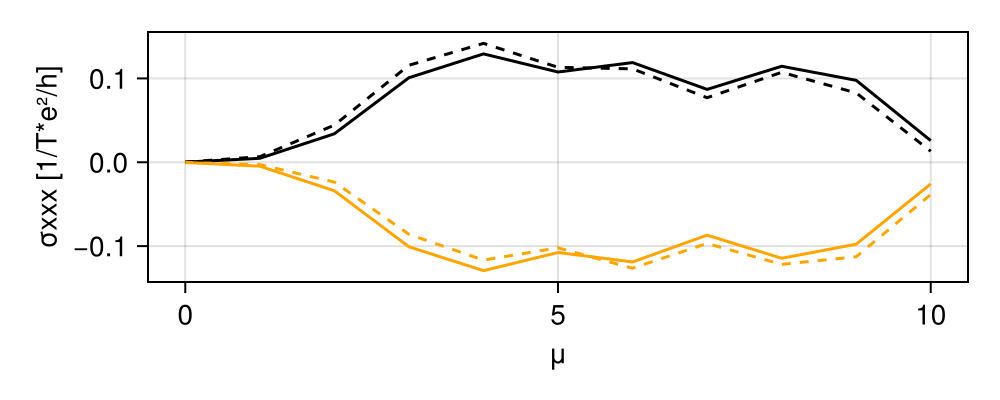

In [32]:
include(rhomb_folder * "model.jl")
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
lines!(ax, μlist, -lmcnv, color = :orange)
lines!(ax, μlist, -lmcps, color = :black, linestyle = :dash)
lines!(ax, μlist, -lmcns, color = :orange, linestyle = :dash)
# si hay TRS meaning no VP, there is still a zero response but the cancelation happens between opposite spins in opposite valleys

fig

In [24]:
@time lmcps = [linear_magneto_conductivity_spin(Planar_σijk_presets_spin([1I,1I,1I], lmcnoshift_presets(μ, 1, evals))) for μ in μlist];

  1.588902 seconds (48.50 M allocations: 1.750 GiB, 13.83% gc time, 9.43% compilation time: 69% of which was recompilation)


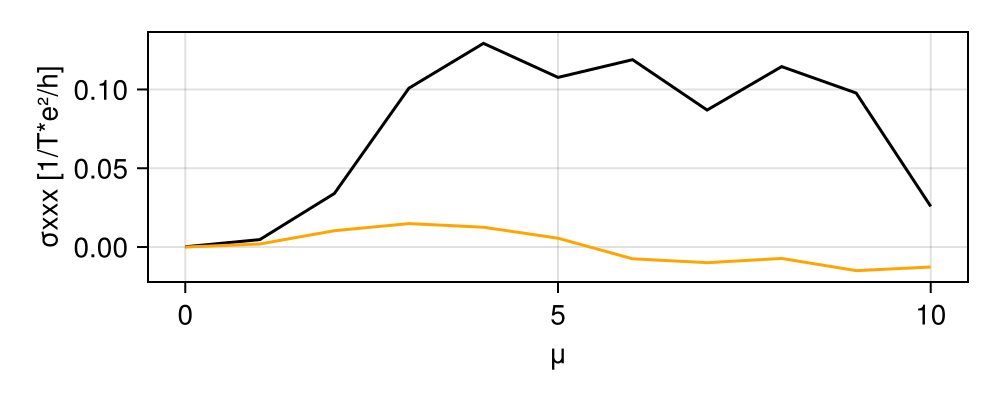

In [23]:
include(rhomb_folder * "model.jl")
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
lines!(ax, μlist, -lmcps, color = :orange)
fig

### LMC shift correction.

In [6]:
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
     T = T, τ = τ, berry_contribution = true, omm_contribution = false, 
     fermi_surface = false, with_shift = true)
lmcpv = [LMC.linear_magneto_conductivity_orbital(lmcnoshift_presets(μ, 1, evals))
     for μ in μlist];
# lmcnv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(μ, -1, evals))
#      for μ in μlist];

101-element Vector{Float64}:
 -1.0483848267321354e-18
 -3.1661302481802384e-8
 -7.428393270063104e-8
 -1.426238002147281e-7
 -2.6033914062929716e-7
 -4.68178356097023e-7
 -8.380782307529688e-7
 -1.498039314975326e-6
 -2.676345402674801e-6
 -4.780293053676884e-6
  ⋮
  0.0028413822871664125
  0.002877490594841496
  0.0029038008782147785
  0.002943732543514084
  0.0029766228237453167
  0.0030085518358871815
  0.0030322172836058443
  0.0030625744826680355
  0.0030906283295602335

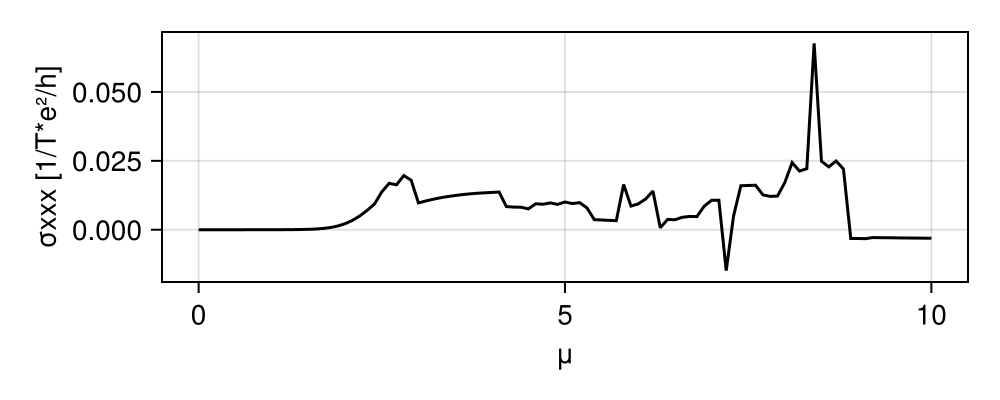

In [8]:
using CairoMakie
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
# lines!(ax, μlist, -lmcnv, color = :orange)
fig

### Drude conductivtiy

In [84]:
xx_drude_presets(μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)

xx_drude_presets (generic function with 5 methods)

In [60]:
drudepv = [drude_conductivity(xx_drude_presets(μ,1)) for μ in μlist];
drudenv = [drude_conductivity(xx_drude_presets(μ,-1)) for μ in μlist];

### LMC/Drude

In [ ]:
evals = 40000 #80000
μlist = collect(0:0.1:10)
T = 1
N = 7
xx_drude_presets(N, μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)
lmcnoshift_presets(N, μ, ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

lmcpv = [LMC.linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, 1, evals))
     for μ in μlist];
# lmcnv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, -1, evals))
#      for μ in μlist];


In [ ]:
drudepv = [LMC.drude_conductivity(LMC.xx_drude_presets(N, μ, 1, p; evals = evals, T = 1)) for μ in μlist];
# drudenv = [drude_conductivity(xx_drude_presets(N, μ, -1, evals)) for μ in μlist];

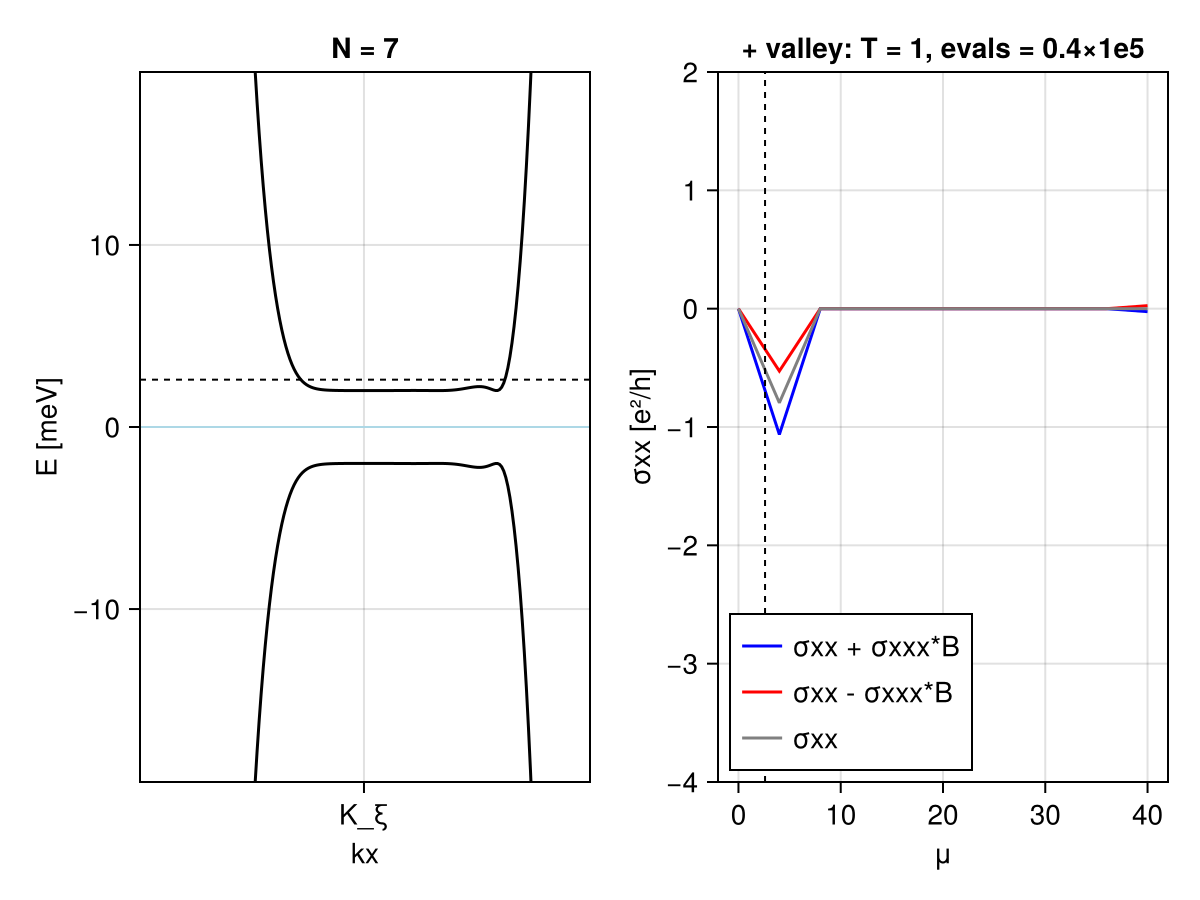

In [157]:
# single valley
B = 10
fig = Figure()
ax = Axis(fig[1,2], xlabel = "μ", ylabel = "σxx [e²/h]", title = "+ valley: T = $(T), evals = $(evals/1e5)×1e5")
lines!(ax, μlist, (lmcpv) .*B + (drudepv), label = "σxx + σxxx*B", color = :blue)
lines!(ax, μlist, -(lmcpv) .*B + (drudepv), label = "σxx - σxxx*B", color = :red)
lines!(ax, μlist,(drudepv), label = "σxx", color = :gray)
axislegend(ax, position = :lb)
ylims!(ax, [-4,2])
ax2 = Axis(fig[1, 1]; xlabel = "kx", ylabel = "E [meV]", title = "N = $(N)")
LMC.abcNplotbandsk(ax2, N, 100, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
vlines!(ax, 2.6, linestyle = :dash, linewidth = 1, color = :black )
hlines!(ax2, 2.6, linestyle = :dash, linewidth = 1, color = :black )

hlines!(ax2, μlist[1], linestyle = :solid, linewidth = 1, color = :lightblue)
hlines!(ax2, μlist[end], linestyle = :solid, linewidth = 1, color = :lightblue )
# hlines!(ax2,  10.5, linestyle = :dash, linewidth = 1, color = :black )
# vlines!(ax, 10.5, linestyle = :dash, linewidth = 1, color = :black )
fig
# lines!(ax, μlist, lmcpv .*B ./ drudepv, color = :gray)
# lines!(ax, μlist, lmcnv .*B ./  drudenv, color = :orange)
# scatter!(ax, μlist, (lmcpv+ lmcnv) .*B ./ (drudepv +drudenv))

### Figure-NoninteractingNRHG

In [23]:
μlist = collect(0:0.125:7)
p = Params_rhombohedral(1, 0, 3160, 390,-20, 315, 0*44, 1, 0)
B = 10
evals = 100000#200000 # T =4K evals = 200000 is ok for drude
T = 0.3 #evals 80000 not perfect
τ = 200
N = 7

xx_drude_presets(N, μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T, τ = τ)
lmcnoshift_presets(N, μ, ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

lmcnoshift_presets (generic function with 1 method)

In [24]:
drude = [LMC.drude_conductivity(LMC.xx_drude_presets(N, μ, 1, p; evals = evals, T = T)) for μ in μlist];

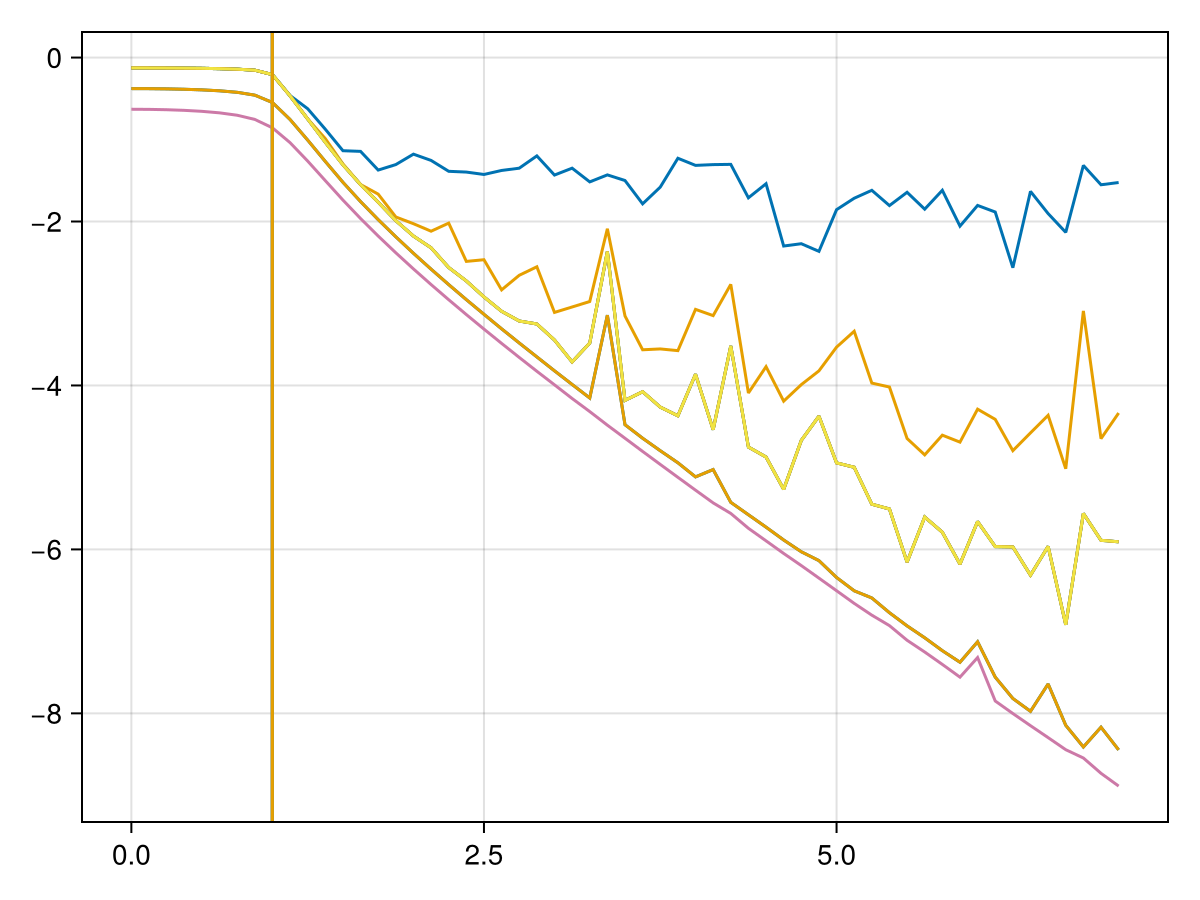

In [26]:
# figd = Figure()
# axd = Axis(figd[1,1])
lines!(axd, μlist, drude)
vlines!(axd, 1)
figd

In [53]:
N = 7
lmcpv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, 1, evals))
for μ in μlist];

In [54]:
using JLD2
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN$(N)it$(evals)T$(T).jld" μlist lmcpv T N

In [55]:
N = 3
lmcpv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, 1, evals))
for μ in μlist];
using JLD2
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/lmcpN$(N)it$(evals)T$(T).jld" μlist lmcpv T N

In [56]:
using JLD2
N = 3
drude = [LMC.drude_conductivity(LMC.xx_drude_presets(N, μ, 1, p; evals = evals, T = T)) for μ in μlist];
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/drudeN$(N)it$(evals)T$(T).jld" μlist drude T N

In [57]:
using JLD2
N = 7
drude = [LMC.drude_conductivity(LMC.xx_drude_presets(N, μ, 1, p; evals = evals, T = T)) for μ in μlist];
@save "/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Packages/LMC/src/Paper/Figure_2/drudeN$(N)it$(evals)T$(T).jld" μlist drude T N

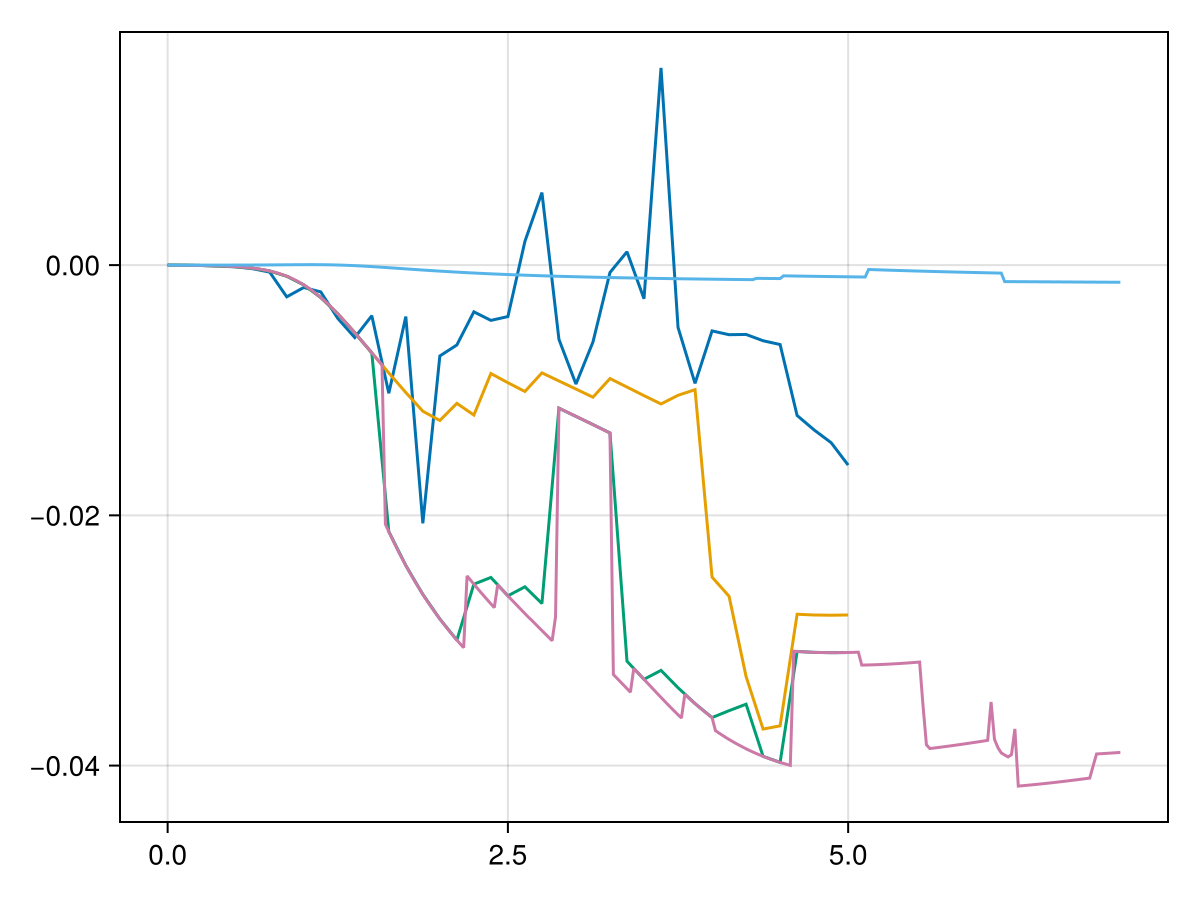

In [58]:
# figs = Figure()
# axs = Axis(figs[1,1])
lines!(axs, μlist, lmcpv)
figs

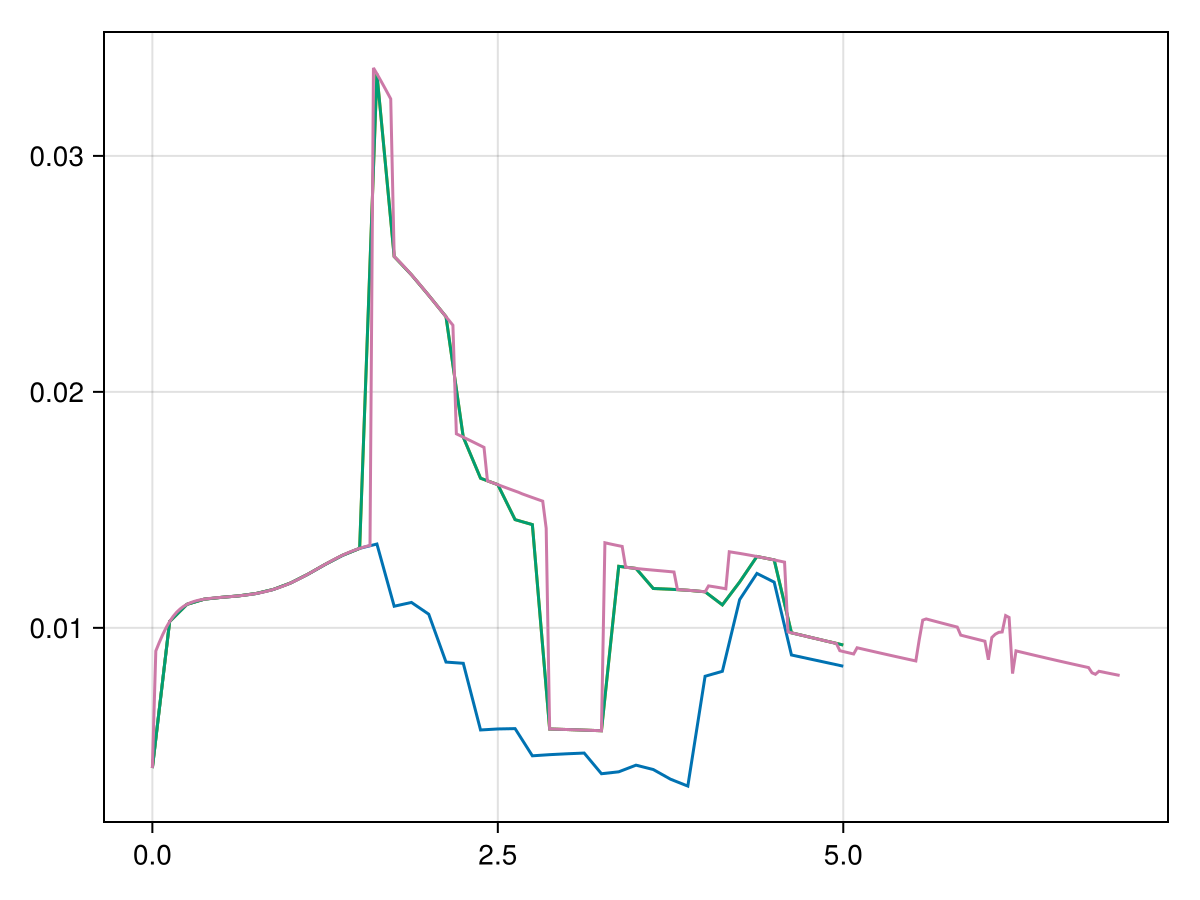

In [47]:
# figc = Figure()
# axc = Axis(figc[1,1])
lines!(axc, μlist, lmcpv ./ drude)
figc

In [348]:

 lmcpv = [[LMC.linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, 1, evals))
      for μ in μlist] for N in [3,5,7]];
 lmcnv = [[linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, -1, evals))
      for μ in μlist] for N in [3,5,7]];

drude = [[LMC.drude_conductivity(LMC.xx_drude_presets(N, μ, 1, p; evals = evals, T = T)) for μ in μlist] for N in [3,5,7]];


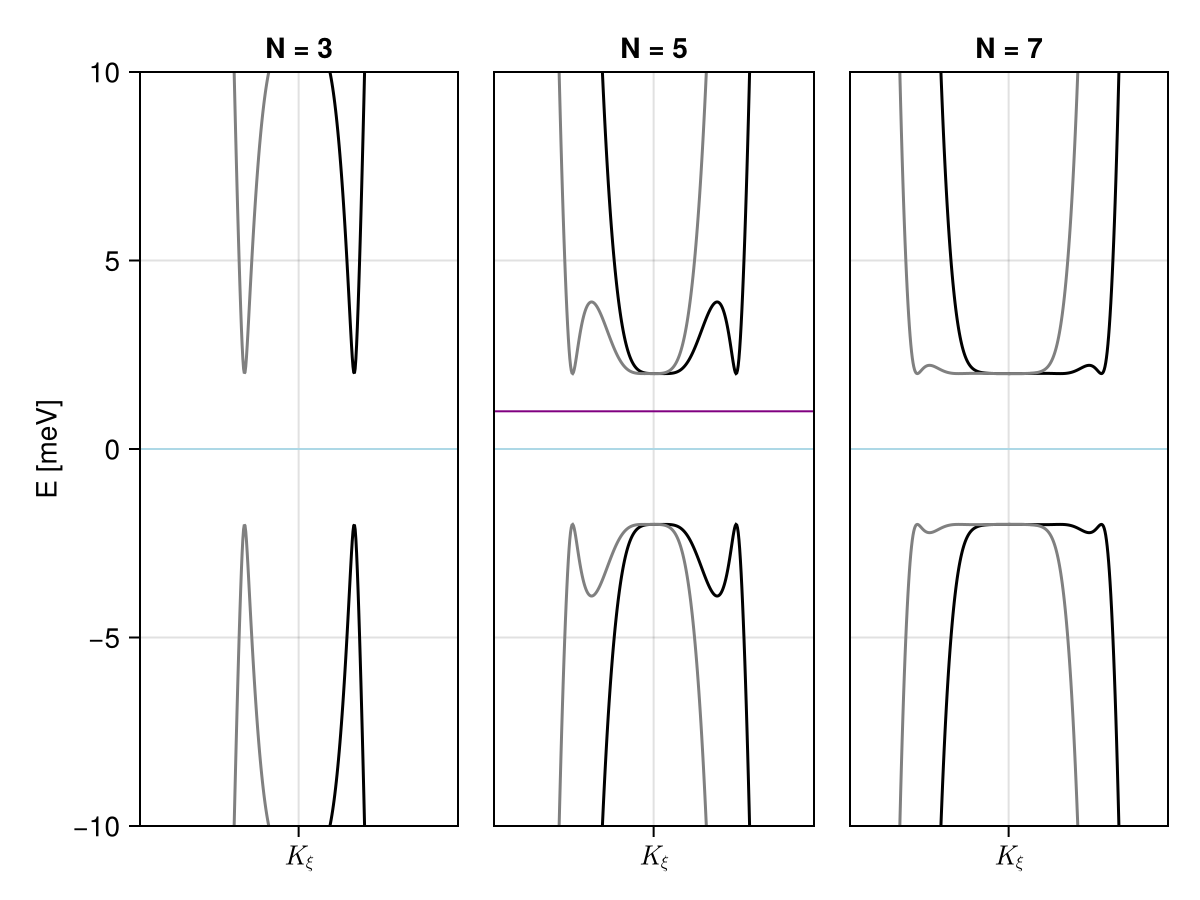

In [11]:
using LaTeXStrings
# single valley
# B = 10
# fig = Figure()
# ax = Axis(fig[1,2], xlabel = "μ", ylabel = "σxx [e²/h]", title = "+ valley: T = $(T), evals = $(evals/1e5)×1e5")
# lines!(ax, μlist, (lmcpv) .*B + (drudepv), label = "σxx + σxxx*B", color = :blue)
# lines!(ax, μlist, -(lmcpv) .*B + (drudepv), label = "σxx - σxxx*B", color = :red)
# lines!(ax, μlist,(drudepv), label = "σxx", color = :gray)
# axislegend(ax, position = :lb)
# ylims!(ax, [-4,2])

#bands
fig = Figure()
kpoints = 200
ax = Axis(fig[1, 1]; ylabel = "E [meV]", title = "N = 3")
ax2 = Axis(fig[1, 2];  ylabel = "E [meV]", title = "N = 5")
ax3 = Axis(fig[1, 3];  ylabel = "E [meV]", title = "N = 7")
LMC.abcNplotbandsk(ax, 3, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
LMC.abcNplotbandsk(ax2, 5, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)
LMC.abcNplotbandsk(ax3, 7, kpoints, Params_rhombohedral(p, ξ =1); ylims = [-1, 1], color = :black)

LMC.abcNplotbandsk(ax, 3, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)
LMC.abcNplotbandsk(ax2, 5, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)
LMC.abcNplotbandsk(ax3, 7, kpoints, Params_rhombohedral(p, ξ =-1); ylims = [-1, 1], color = :gray)
ylims!(ax, -10,10)
ylims!(ax2, -10,10)
ylims!(ax3, -10,10)

hideydecorations!(ax2, grid = false)
hideydecorations!(ax3, grid = false)

# hlines!(ax, 2.6, linestyle = :dash, linewidth = 1, color = :black )
for axis in [ax,ax2,ax3]
    hlines!(axis, μlist[1], linestyle = :solid, linewidth = 1, color = :lightblue)
    hlines!(axis, μlist[end], linestyle = :solid, linewidth = 1, color = :lightblue )
end

hlines!(ax2, 1, linestyle = :solid, linewidth = 1, color = :purple)

# ax4 = Axis(fig[3,1:3]; xlabel = "μ [meV]", ylabel = "σxxx/σxx [1/T]")
# colorlist= [:lightblue, :blue, :purple]

# for i in 1:3
#     v = lmcpv[i] ./ drude[i]
#     inds = findall(x -> x >1, v)

#     v[inds] .= 0 
#     lines!(ax4, μlist, v , color = colorlist[i], label = "N = $([3,5,7][i])")
# end




# axislegend(ax4, position = :lb)
# ax5 = Axis(fig[2,1:3])
# [lines!(ax5, μlist, drude[i], label = "N = $([3,5,7][i])") for i in 1:3]
# axislegend(ax5, position = :lb)
# hidexdecorations!(ax5, grid = false)

function lat_fig2(strpath2a, strpath2b, strpath2c, strpath2d)
    with_theme(merge(theme_latexfonts(), Theme(fontsize = fontsizetheme))) do #
        figure2(strpath2a, strpath2b, strpath2c, strpath2d)     
    end
end


fig

#### LMC/Drude vs temperature

In [229]:
evals = 200000
μ = 5
Tlist = collect(1:2:10)

xx_drude_presets(N, μ,ξ, evals, T) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)
lmcnoshift_presets(N, μ, ξ, evals, T) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

lmcpv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, 1, evals, T))
     for T in Tlist];
# lmcnv = [linear_magneto_conductivity_orbital(lmcnoshift_presets(N, μ, -1, evals, T))
    #  for T in Tlist];
drudepv = [drude_conductivity(xx_drude_presets(N, μ, 1, evals, T)) for T in Tlist];
# drudenv = [drude_conductivity(xx_drude_presets(N, μ, -1, evals, T)) for T in Tlist];

5-element Vector{Float64}:
 -3.534897775478475
 -3.62418914430746
 -3.580552921396425
 -3.5413796221517213
 -3.516549300230137

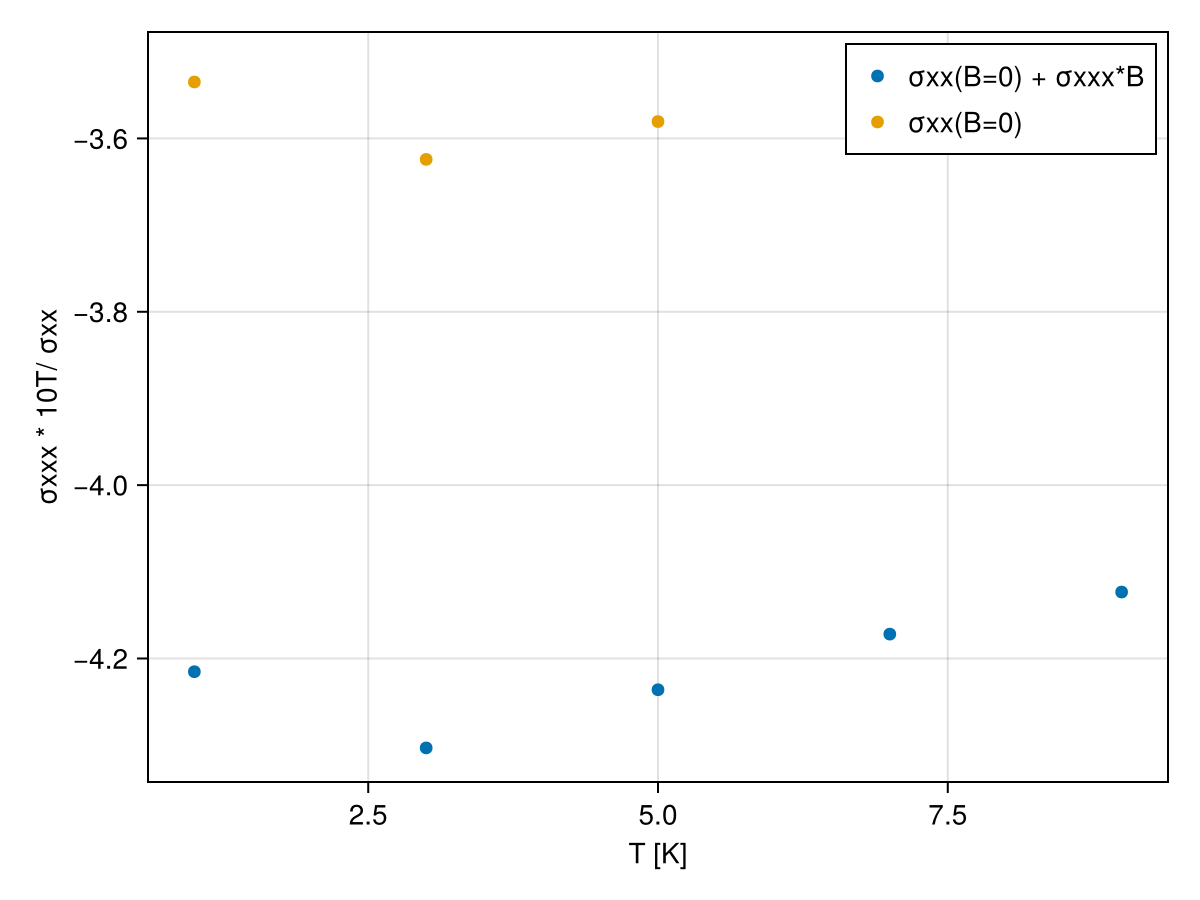

In [230]:
B = 10
fig = Figure()
ax = Axis(fig[1,1], xlabel = "T [K]", ylabel = "σxxx * $(B)T/ σxx")
# lines!(ax, μlist, lmcpv .*B ./ drudepv, color = :gray)
# lines!(ax, μlist, lmcnv .*B ./  drudenv, color = :orange)
# scatter!(ax, μlist, (lmcpv+ lmcnv) .*B ./ (drudepv +drudenv))
scatter!(ax, Tlist, (lmcpv) .*B .+ (drudepv ), label = "σxx(B=0) + σxxx*B")
scatter!(ax, Tlist, (drudepv), label = "σxx(B=0) ")

# lines!(ax, Tlist, (lmcpv+ lmcnv) .*B .+ (drudepv +drudenv), label = "σxx(B=0) + σxxx*B")
# lines!(ax, Tlist, (drudepv +drudenv), label = "σxx(B=0) ")

# lines!(ax, Tlist,(drudepv +drudenv), color = :gray, label = "σxx(B=0)")
axislegend(ax)#, position = (1,1))
# ylims!(ax, [-0.2,0.2])
fig

#### LMC/Drude vs number of layers

### Anomalous Hall Effect

In [173]:
# each valley contributes with N/2 e^2/h
include(rhomb_folder * "model.jl")

abc_pentalayer (generic function with 2 methods)

In [173]:
# include(rhomb_folder * "model.jl")
μ = 0
ξ = -1
T = 0
N = 5
evals = 5000
μlist = collect(0:4:40)

11-element Vector{Int64}:
  0
  4
  8
 12
 16
 20
 24
 28
 32
 36
 40

In [174]:
ahe_pos = [σij_anomalous_hall(σxyahe_presets(N, μ, 1, p, evals = evals, T = T)) for μ in μlist];
ahe_neg = [σij_anomalous_hall(σxyahe_presets(N, μ, -1, p, evals = evals, T = T)) for μ in μlist];

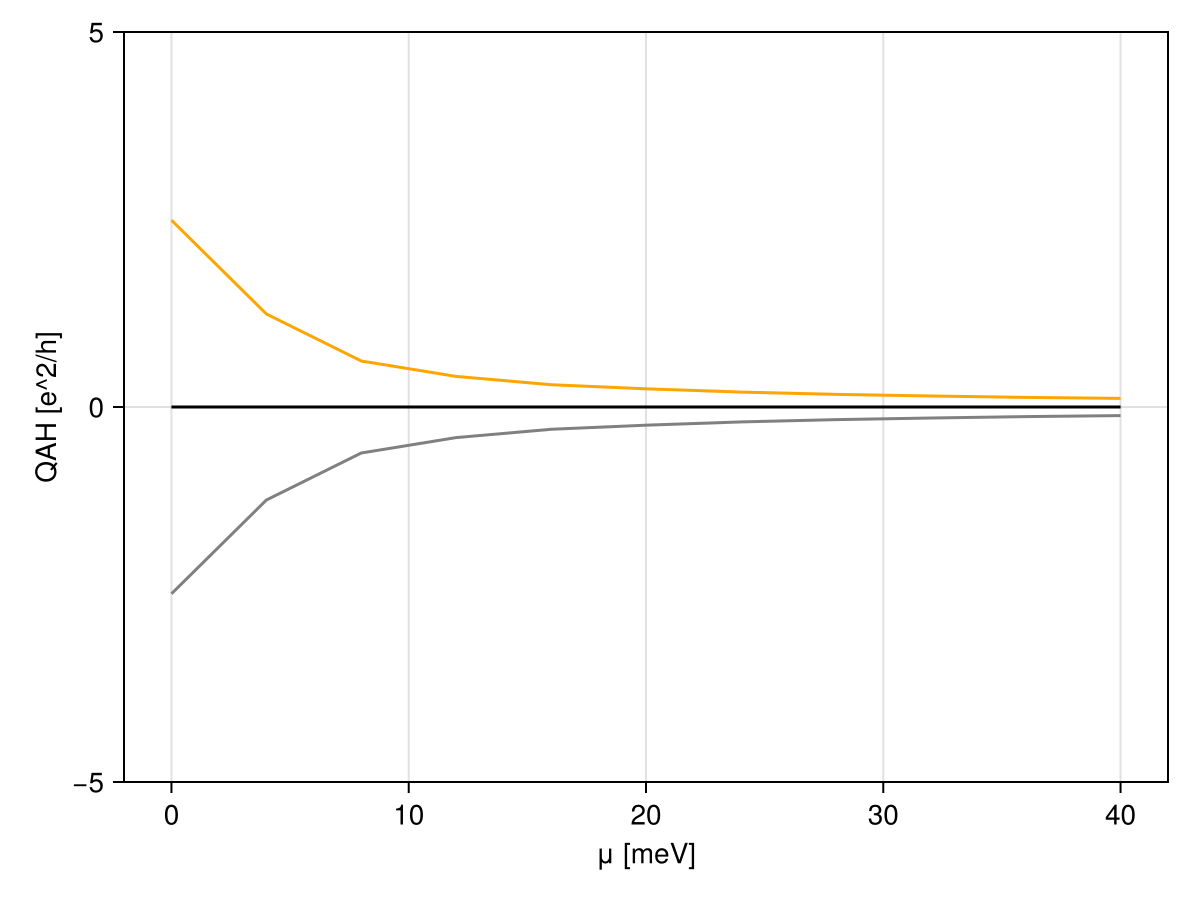

In [175]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "QAH [e^2/h]")
lines!(ax, μlist, ahe_pos, color =:gray)
lines!(ax, μlist, ahe_neg, color =:orange)
lines!(ax, μlist, ahe_pos+ahe_neg, color =:black)
ylims!(-N,N)
fig 

#### QAH in a Spinfull valleyfull model

In [176]:
"""given a gap size and valley asymmetry params it returns a set of parameters for the computation of a given observable assuming a half metal.
Valley asymmetry is not really required I think but I leave it just in case"""
function half_metal_presets(p, Delta_Ez, Valley_asym = 0)
    pvsu = Params_rhombohedral(p, ξ = 1, Delta_Ez = 0, Valley_asym = Valley_asym)
    pvsd = Params_rhombohedral(p, ξ = 1, Delta_Ez = 0, Valley_asym = Valley_asym)
    nvsu = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    nvsd = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    return [pvsu, pvsd, nvsu, nvsd]
end

"""given a gap size and valley asymmetry params it returns a set of parameters for the computation of a given observable assuming a quarter metal."""
function quarter_metal_presets(p, Delta_Ez, Valley_asym = 0)
    pvsu = Params_rhombohedral(p, ξ = 1, Delta_Ez = 0, Valley_asym = Valley_asym)
    pvsd = Params_rhombohedral(p, ξ = 1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    nvsu = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    nvsd = Params_rhombohedral(p, ξ = -1, Delta_Ez = Delta_Ez, Valley_asym = Valley_asym)
    return [pvsu, pvsd, nvsu, nvsd]
end

function half_metal_plotbands(p::Params_rhombohedral, N, Delta_Ez, Valley_asym = 0; points = 100)
    ps = half_metal_presets(p, Delta_Ez, Valley_asym)
    return spinfull_plotbands(N, ps, points = points)
end

function quarter_metal_plotbands(p::Params_rhombohedral, N, Delta_Ez, Valley_asym = 0; points = 100)
    ps = quarter_metal_presets(p, Delta_Ez, Valley_asym)
    return spinfull_plotbands(N, ps, points = points)
end

function spinfull_plotbands(N, ps; points = 100)
    fig = Figure()
    ax = Axis(fig[1:2, 0]; xlabel = "kx", ylabel = "E [meV]")
    spinfull_plotbands!(ax, N, ps, points = points)
    return fig
end

function spinfull_plotbands!(ax, N, ps; points = 100)
    abcNplotbandsk(ax, N, points, ps[1]; ylims = [-1, 1], color = :black)#, style = :solid)
    abcNplotbandsk(ax, N, points, ps[2]; ylims = [-1, 1], color = :black)#, style = :dash)
    abcNplotbandsk(ax, N, points, ps[3]; ylims = [-1, 1], color = :gray)#, style = :solid)
    abcNplotbandsk(ax, N, points, ps[4]; ylims = [-1, 1], color = :gray)#, style = :dash)
end

function half_metal_dos(N, p, Delta_Ez, Valley_asym, μlist; evals = 100, η = 0.05)
    ps = half_metal_presets(p, Delta_Ez, Valley_asym)
    ω, js = spinfull_dos(N, ps, η, evals)
    fig = Figure()
    ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "DOS (a.u.)")
    plot_dos!(ax, ω, js)
    fig
end


function quarter_metal_dos(N, p, Delta_Ez, Valley_asym, μlist; evals = 100, η = 0.05)
    ps = quarter_metal_presets(p, Delta_Ez, Valley_asym)
    ω, js = spinfull_dos(N, ps, η, evals)
    fig = Figure()
    ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "DOS (a.u.)")
    plot_dos!(ax, ω, js)
    fig
end

function spinfull_dos(N, ps, η, evals)
    nps = [xxx_lmc_presets(N, ps[i]) for i in 1:length(ps)]
    ω, j1 = c_dos(nps[1], μlist, η = η, evals = evals)
    ω, j2 = c_dos(nps[2], μlist, η = η, evals = evals)
    ω, j3 = c_dos(nps[3], μlist, η = η, evals = evals)
    ω, j4 = c_dos(nps[4], μlist, η = η, evals = evals)
    return ω, [j1,j2,j3,j4]
end

function plot_dos!(ax, ω, js)
    colors = [:black, :black, :gray, :gray]
    styles = [:solid, :dash, :solid, :dash]
    labels = ["+↑", "+↓", "-↑", "-↓"]
    for (i,j) in enumerate(js)
        lines!(ax, ω, j, color = colors[i], linestyle = styles[i], label = labels[i])
    end
    axislegend(ax)
end


plot_dos! (generic function with 1 method)

Bands

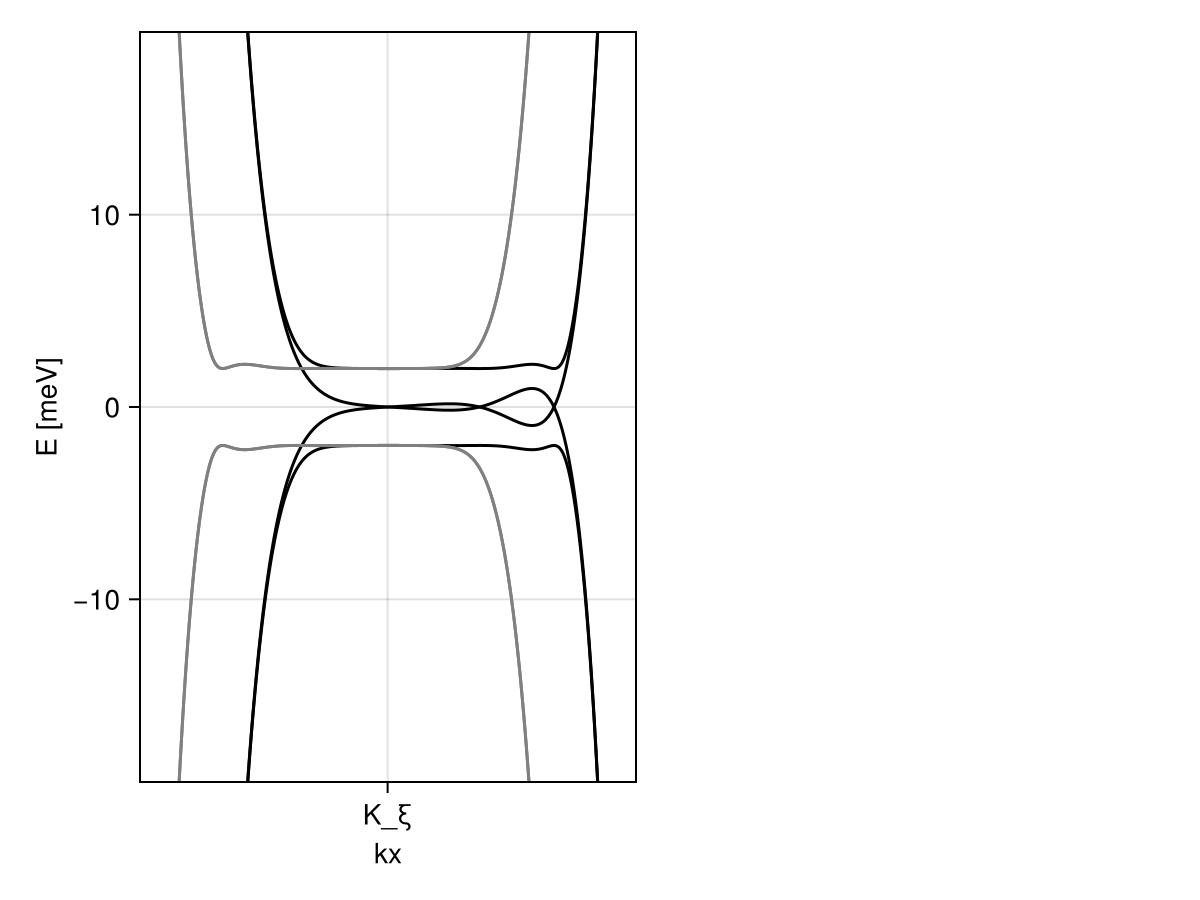

In [173]:
quarter_metal_plotbands(p, N, p.Delta_Ez, 0, points = 300)

DOS

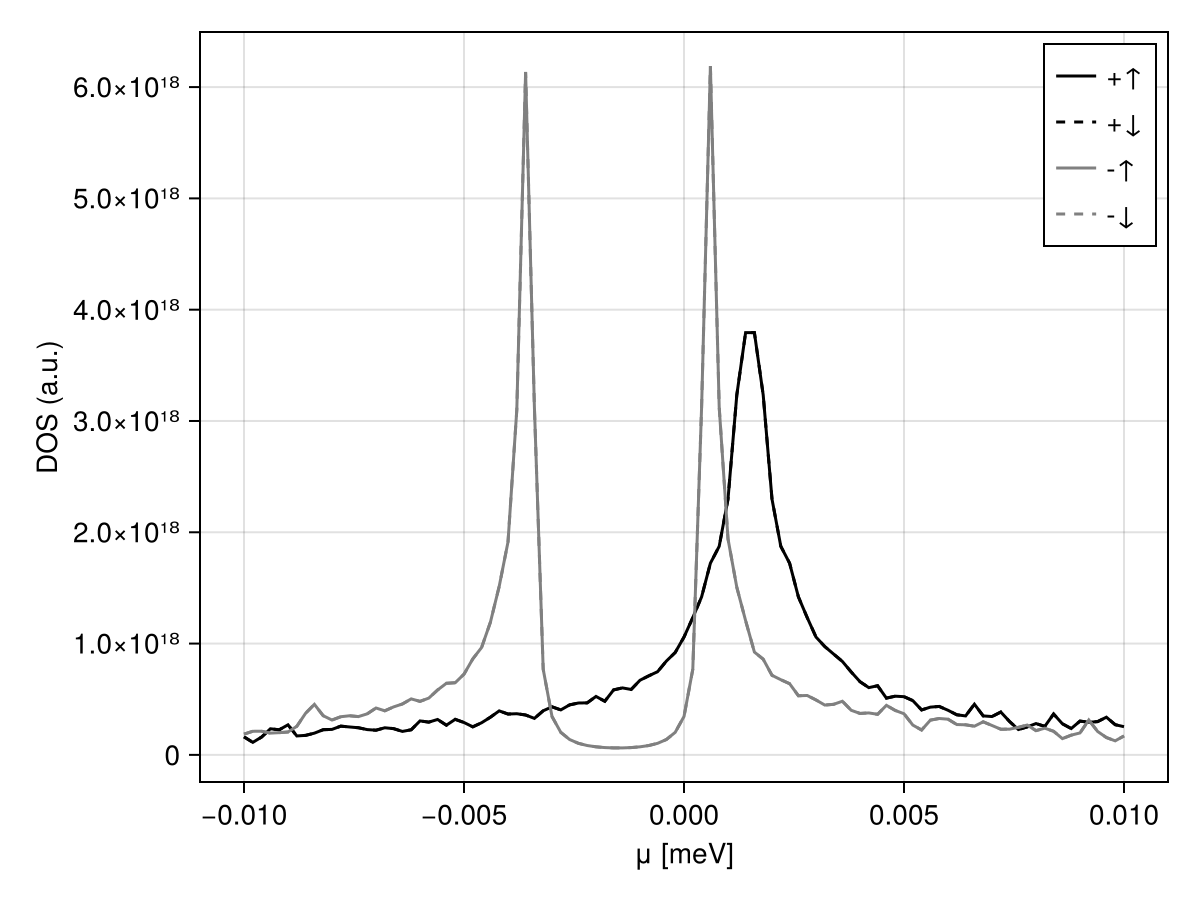

In [177]:
half_metal_dos(N, p, p.Delta_Ez, 3, μlist, η = 0.1 ,evals = 1e4)

#### Filling


In [25]:
μlist = collect(-5:.1:5)
fills = [rh_filling(N, p, μ, T = T, evals = evals) for μ in μlist];

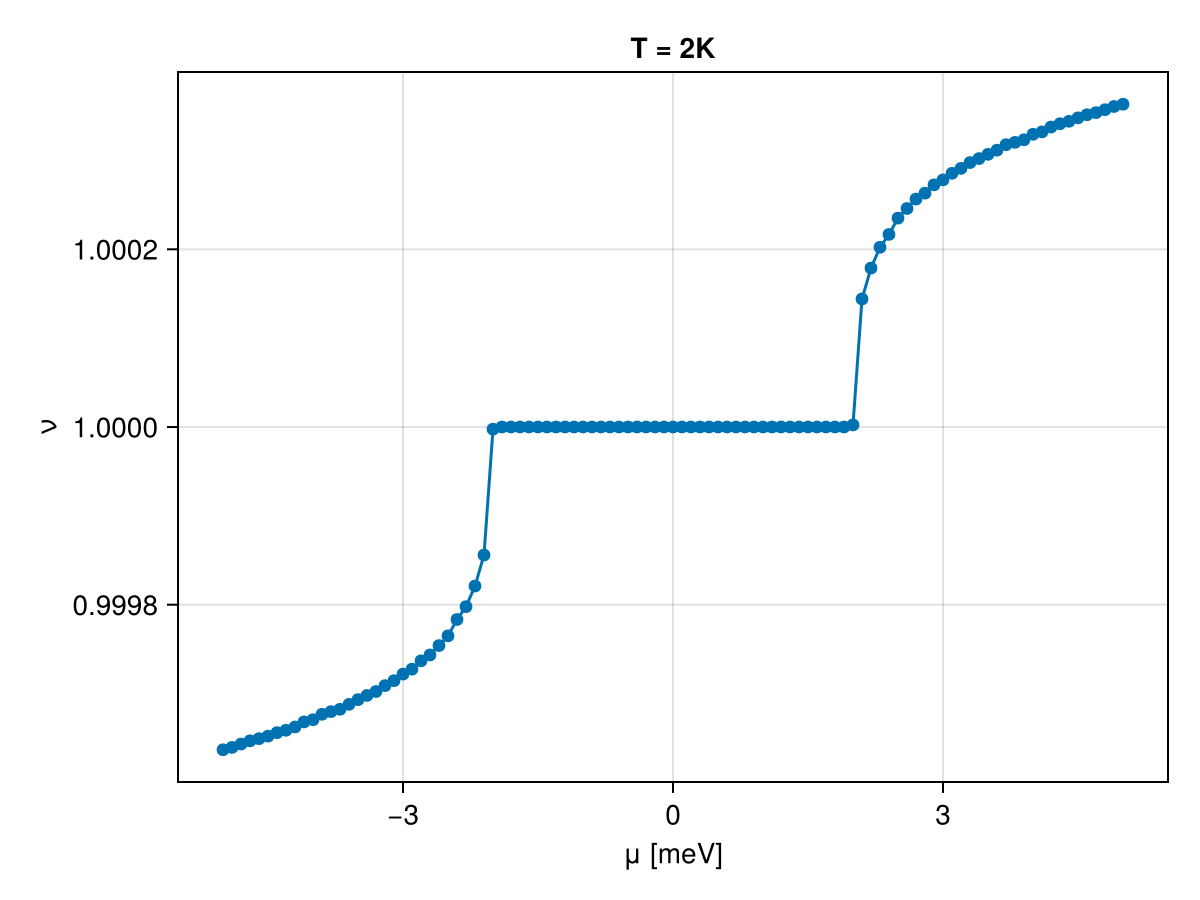

In [29]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "μ [meV]", ylabel = "ν", title = "T = $(T)K")
scatter!(ax, μlist, fills)
lines!(ax, μlist, fills)
fig

## k-resolved observables

### K-resolved plots: General panel

In [ ]:
# p = lmcnoshift_presets(μ,ξ, Ω_contr = true, omm_contr = true, fermi_surface = false, with_shift = true)
# kxs, kys, Zs = kresolvedlmc(p; points = 300, Ω_contr = p.Ω_contr, omm_contr = p.omm_contr, fermi_surface = p.fermi_surface, with_shift = p.shift)
# plotmap(kxs,kys, Zs, Ω_contr = p.Ω_contr, omm_contr = p.omm_contr, fermi_surface = p.fermi_surface, with_shift = p.shift)

In [12]:
include(rhomb_folder * "wrapper_lmc.jl")
include(common_folder * "separate_contributions.jl")

function lmc_fig_contribution(μ, ξ, pR::Params_rhombohedral; N= 3, points = 100, T = 1)
    pΩandomm_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = true, omm_contribution = true, fermi_surface = false, with_shift = false)
    pΩ_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = true, omm_contribution = false, fermi_surface = false, with_shift = false)
    pomm_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = false, omm_contribution = true, fermi_surface = false, with_shift = false)

    fig = Figure(size=(2*600,600))
    ax1 = Axis(fig[1, 1], xlabel = "kx", ylabel = "ky", title = "Contributions: Ω and OMM. T = $(T)K")
    ax2 = Axis(fig[1, 2], xlabel = "kx", ylabel = "ky", title = "Contributions: Ω. T = $(T)K")
    ax3 = Axis(fig[1, 3], xlabel = "kx", ylabel = "ky", title = "Contributions: OMM. T = $(T)K")
    kres(p) = kresolvedlmc(pR, p; points = points, Ω_contr = p.berry_contribution, omm_contr = p.omm_contribution, fermi_surface = p.fermi_surface, with_shift = p.with_shift)
    
    # components of the lmc
    kxs, kys, Z1s = kres(pΩandomm_contr)
    kxs, kys, Z2s = kres(pΩ_contr)
    kxs, kys, Z3s = kres(pomm_contr)

    # compute in-plane berry
    kxs, kys, Z5s = kresolved_Ωin(pR, pΩandomm_contr, points = points) 
    kxs, kys, Z6s = kresolved_dOMM(pR, pΩandomm_contr, points = points)
    kxs, kys, Z7s = kresolved_Ωz(pR, pΩandomm_contr, points = points)

    m2toang2 = 1e20
    prefactor = 1e6
    Z1s .*= m2toang2
    Z2s .*= m2toang2
    Z3s .*= m2toang2
    Z5s .*= m2toang2 / prefactor
    Z7s .*= m2toang2

    m = minimum([minimum(Z) for Z in [Z1s, Z2s, Z3s]])
    M = maximum([maximum(abs.(Z)) for Z in [Z1s, Z2s, Z3s]])

    println( maximum(Z7s) )
    colrange = [-1,1] .* 3e4 #[m, M]
    colrange2 = [-1,1] .* 2
    colrange3 = [-1,1] ./ 1e11

    colmap =  cgrad([:red, :black, :lightblue])
    colmap2 = cgrad([:red, :white, :lightblue])


    plotmap!(ax1, kxs, kys, Z1s, colrange = colrange, colmap = colmap)
    plotmap!(ax2, kxs, kys, Z2s, colrange = colrange, colmap = colmap)
    hm = plotmap!(ax3, kxs, kys, Z3s, colrange = colrange, colmap = colmap)

    
    ax4 = Axis(fig[1:2, 0]; xlabel = "kx", ylabel = "E [meV]")
    abcNplotbandsk(ax4, N, points, pR; ylims = [-1, 1], color = :black)
    hlines!(ax4, μ) 
    ax5 = Axis(fig[2, 2], xlabel = "kx", ylabel = "ky", title = "Ωx")
    hm2 = plotmap!(ax5, kxs, kys, Z5s, colrange = colrange2, colmap = colmap2)
    ax6 = Axis(fig[2,3], xlabel = "kx", ylabel = "ky", title = "d_OMMxx")
    hm3 = plotmap!(ax6, kxs, kys, Z6s,colrange = colrange2, colmap = colmap2)
    ax7 = Axis(fig[2, 1], xlabel = "kx", ylabel = "ky", title = "Ωz") 
    plotmap!(ax7, kxs, kys, Z7s, colrange = colrange3, colmap = colmap2)
    
    # # cb = Colorbar(fig[3, 2], hm2)
    Colorbar(fig[1,4], hm, label = "LMC integrand")
    Colorbar(fig[3,2], hm2, vertical = false,  flipaxis = false , label = "Å^2/eV [x$(prefactor)]")
    Colorbar(fig[3,3], hm3, vertical = false,  flipaxis =false, label = "m^3/(eV*s)")
    
    hideydecorations!(ax2)
    hidexdecorations!(ax1)
    hidexdecorations!(ax2)
    hidexdecorations!(ax3)
    hideydecorations!(ax3)
    hideydecorations!(ax5)
    hideydecorations!(ax6)

    return fig
end

lmc_fig_contribution (generic function with 1 method)

In [13]:
lmc_fig_contribution(5, -1, p, N = 5, points = 200, T = 2)

UndefVarError: UndefVarError: `k_linear_magneto_conductivity` not defined

### \Omega Z calculations 

In [ ]:
)

In [9]:




function kΩz(fig::Figure, N, ξ, pR, μlist = [0, 2, 4, 6]; col = 1, T = 5, points = 100, colrange = [-1,1])
    colmap = cgrad([:red, :white, :lightblue])
    count = 1
    prefactor = maximum(colrange)
    colrange2 = colrange / prefactor
            
    c1 = RGBf(0.30, 0.65, 1.00)
    c2 = RGBf(0.10, 0.85, 0.55)
    c3 = RGBf(1.00, 0.75, 0.20)

    clist = [c1,c2,c3]

    for μ in μlist[1:end]
        pS = xxx_lmc_presets(N, μ, ξ, pR; T = T)
        kxs, kys, Z1s = kresolved_Ωz(pR, pS, points = points)

        Z1s .*= 1e20/ prefactor
        count += 1
        ax = Axis(fig[col,count], xlabel = "kx", ylabel = "ky")
        hmm = plotmap!(ax, kxs, kys, Z1s, colrange = colrange2, colmap = colmap)
        # text!(ax, "μ = $(μ) [meV]", position =  (0., 0.085), align = (:center, :top))
        if count == length(μlist) + 1
            Colorbar(fig[1,count + 1], hmm, label = "Ωz [×10^$(Int(log10(prefactor))) Å^2] ")
        else nothing end
        if count ≠ 2
            hideydecorations!(ax)
        else nothing end
        if col == 1 || col == 2 
            hidexdecorations!(ax)
        else nothing end
        xlims!(ax, -0.099,0.099)
        ylims!(ax, -0.099,0.099)
        e1 = MarkerElement(color=clist[count-1],  marker=:rect, markersize=18)
        
        axislegend(ax, [e1], [""], framevisible = false, position = (1.1,1.05))
    end
    axlast = Axis(fig[col,1]; xlabel = "kx", ylabel = "E [meV]")
    abcNplotbandsk(axlast, N, points, pR; ylims = [-1, 1], color = :black)
    [hlines!(axlast, μlist[i], color = clist[i]) for i in 1:length(μlist)]
    text!(axlast, "N = $(N)", position =  (Int(round(18 * points/100, digits = 0)),19), align = (:center, :top))
    if col == 1 || col == 2 
        hidexdecorations!(axlast)
    else nothing end
    
    return fig
end


function kΩz(N, ξ, pR, μlist = [0, 2, 4, 6]; kws...)
    return kΩz(Figure(size = (1000,300)), N, ξ, pR, μlist; kws...)
end

function figureΩzvsN(ξ, pR; Nlist = [3,5,7], μlist = [0, 2, 4, 6], kws...)
    fig = Figure(size = (1000,800))
    count = 1
    for N in Nlist
        kΩz(fig, N, ξ, pR, μlist; col = count, kws...)
        count +=1
    end
    return fig
end


    

figureΩzvsN (generic function with 1 method)

#### Figure for a given N

In [12]:
p

Params_rhombohedral
  ξ: Int64 1
  μ: Float64 0.0
  γ0: Float64 3160.0
  γ1: Float64 390.0
  γ2: Float64 -20.0
  γ3: Float64 315.0
  γ4: Float64 0.0
  Delta_Ez: Float64 2.0
  Valley_asym: Float64 0.0


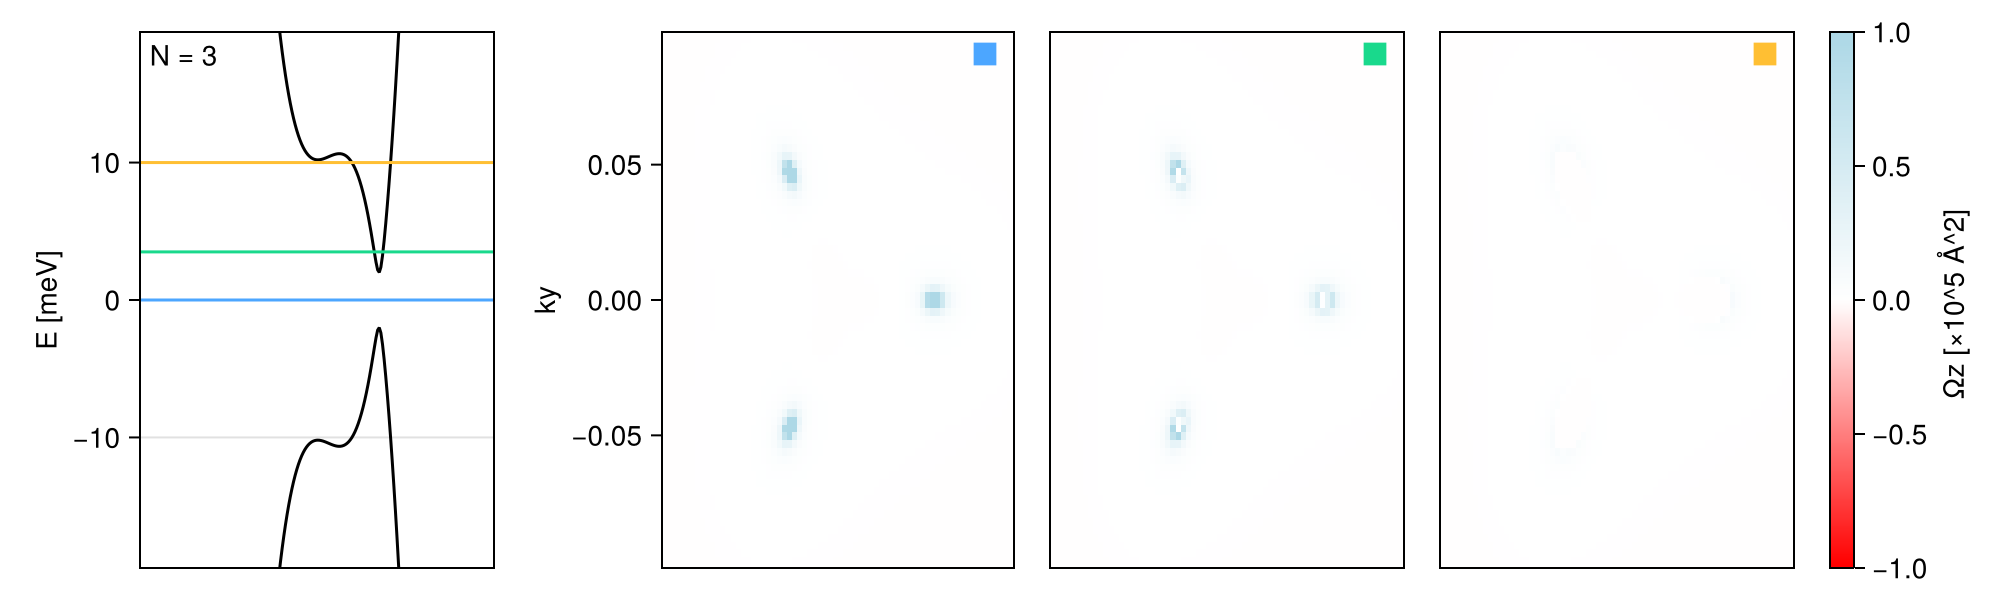

In [155]:
N =  3
include(rhomb_folder * "model.jl")
kΩz( N, 1, p, [0,3.5,10], col =1, T = 2, points = 100, colrange = [-1,1] .* 1e5)

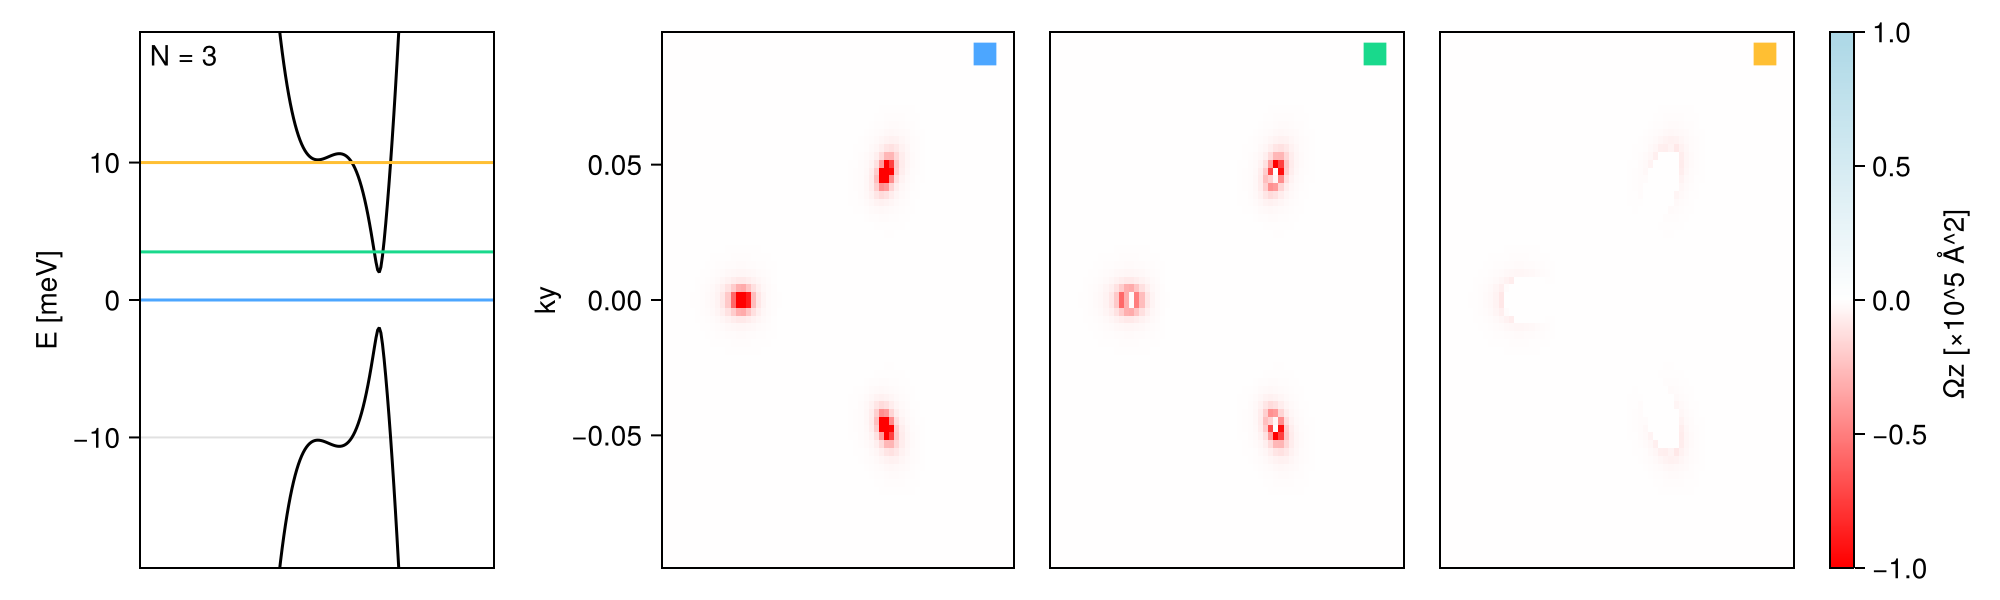

In [156]:
N =  3
include(rhomb_folder * "model.jl")
kΩz( N, -1, p, [0,3.5,10], col =1, T = 2, points = 100, colrange = [-1,1] .* 1e5)

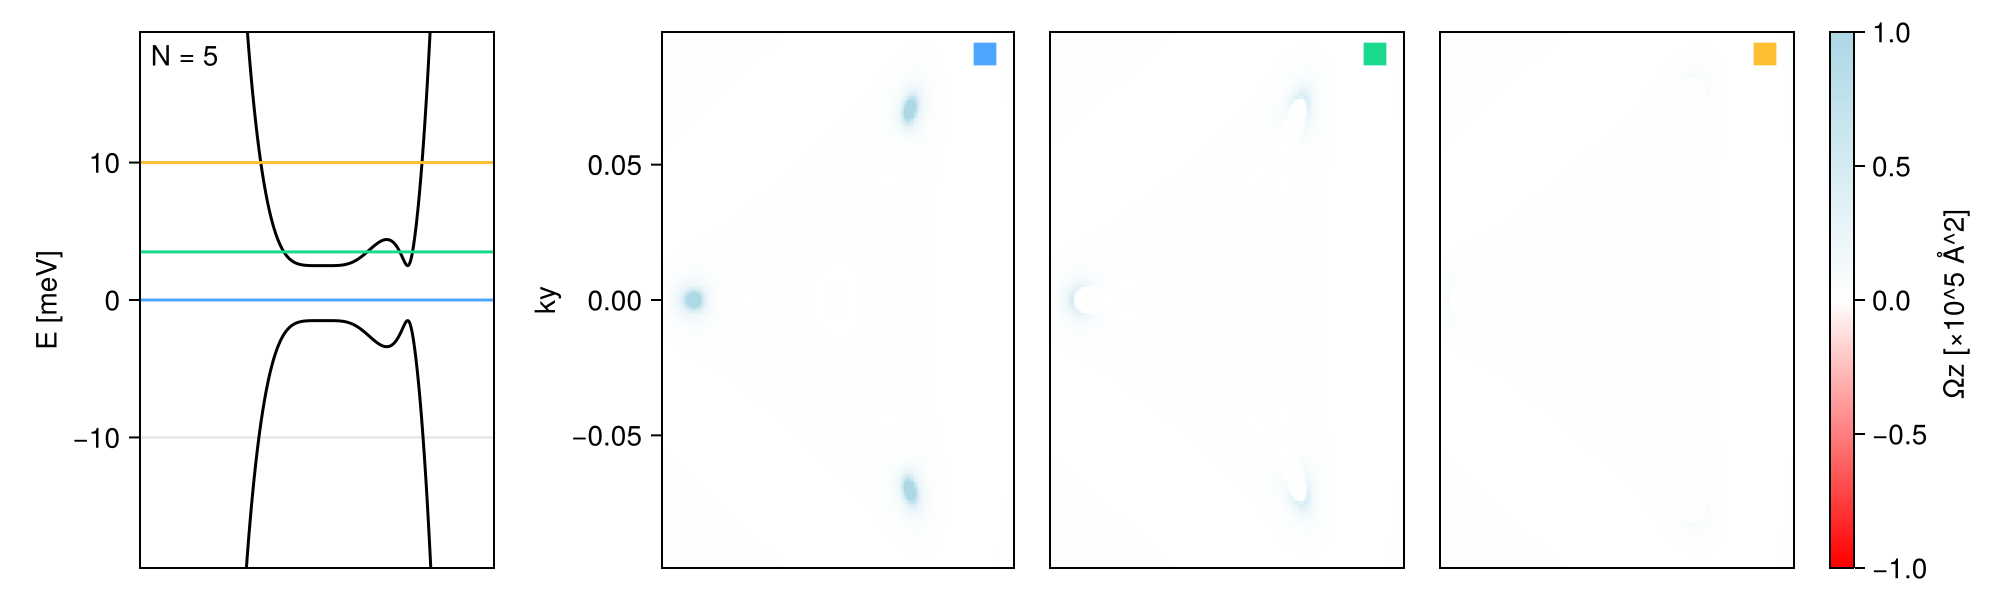

In [67]:
N =  5
kΩz(N, 1, p, [0,3.5,10], T = 2, points = 300, colrange = [-1,1] .* 1e5)

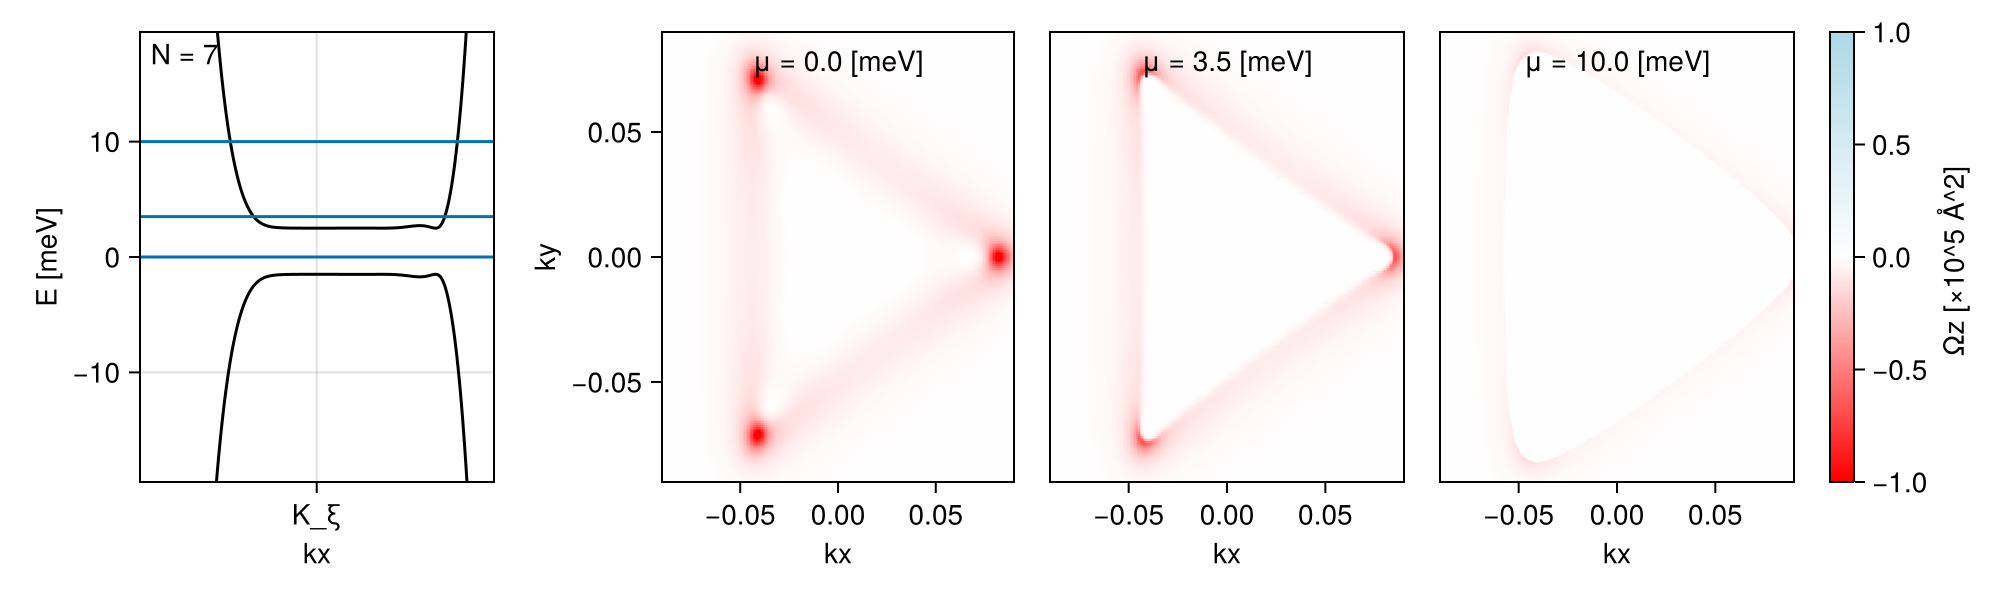

In [23]:
N =  7
kΩz(N, 1, p, [0,3.5,10], T = 2, points = 300, colrange = [-1,1] .* 1e5)

#### Figure vs N

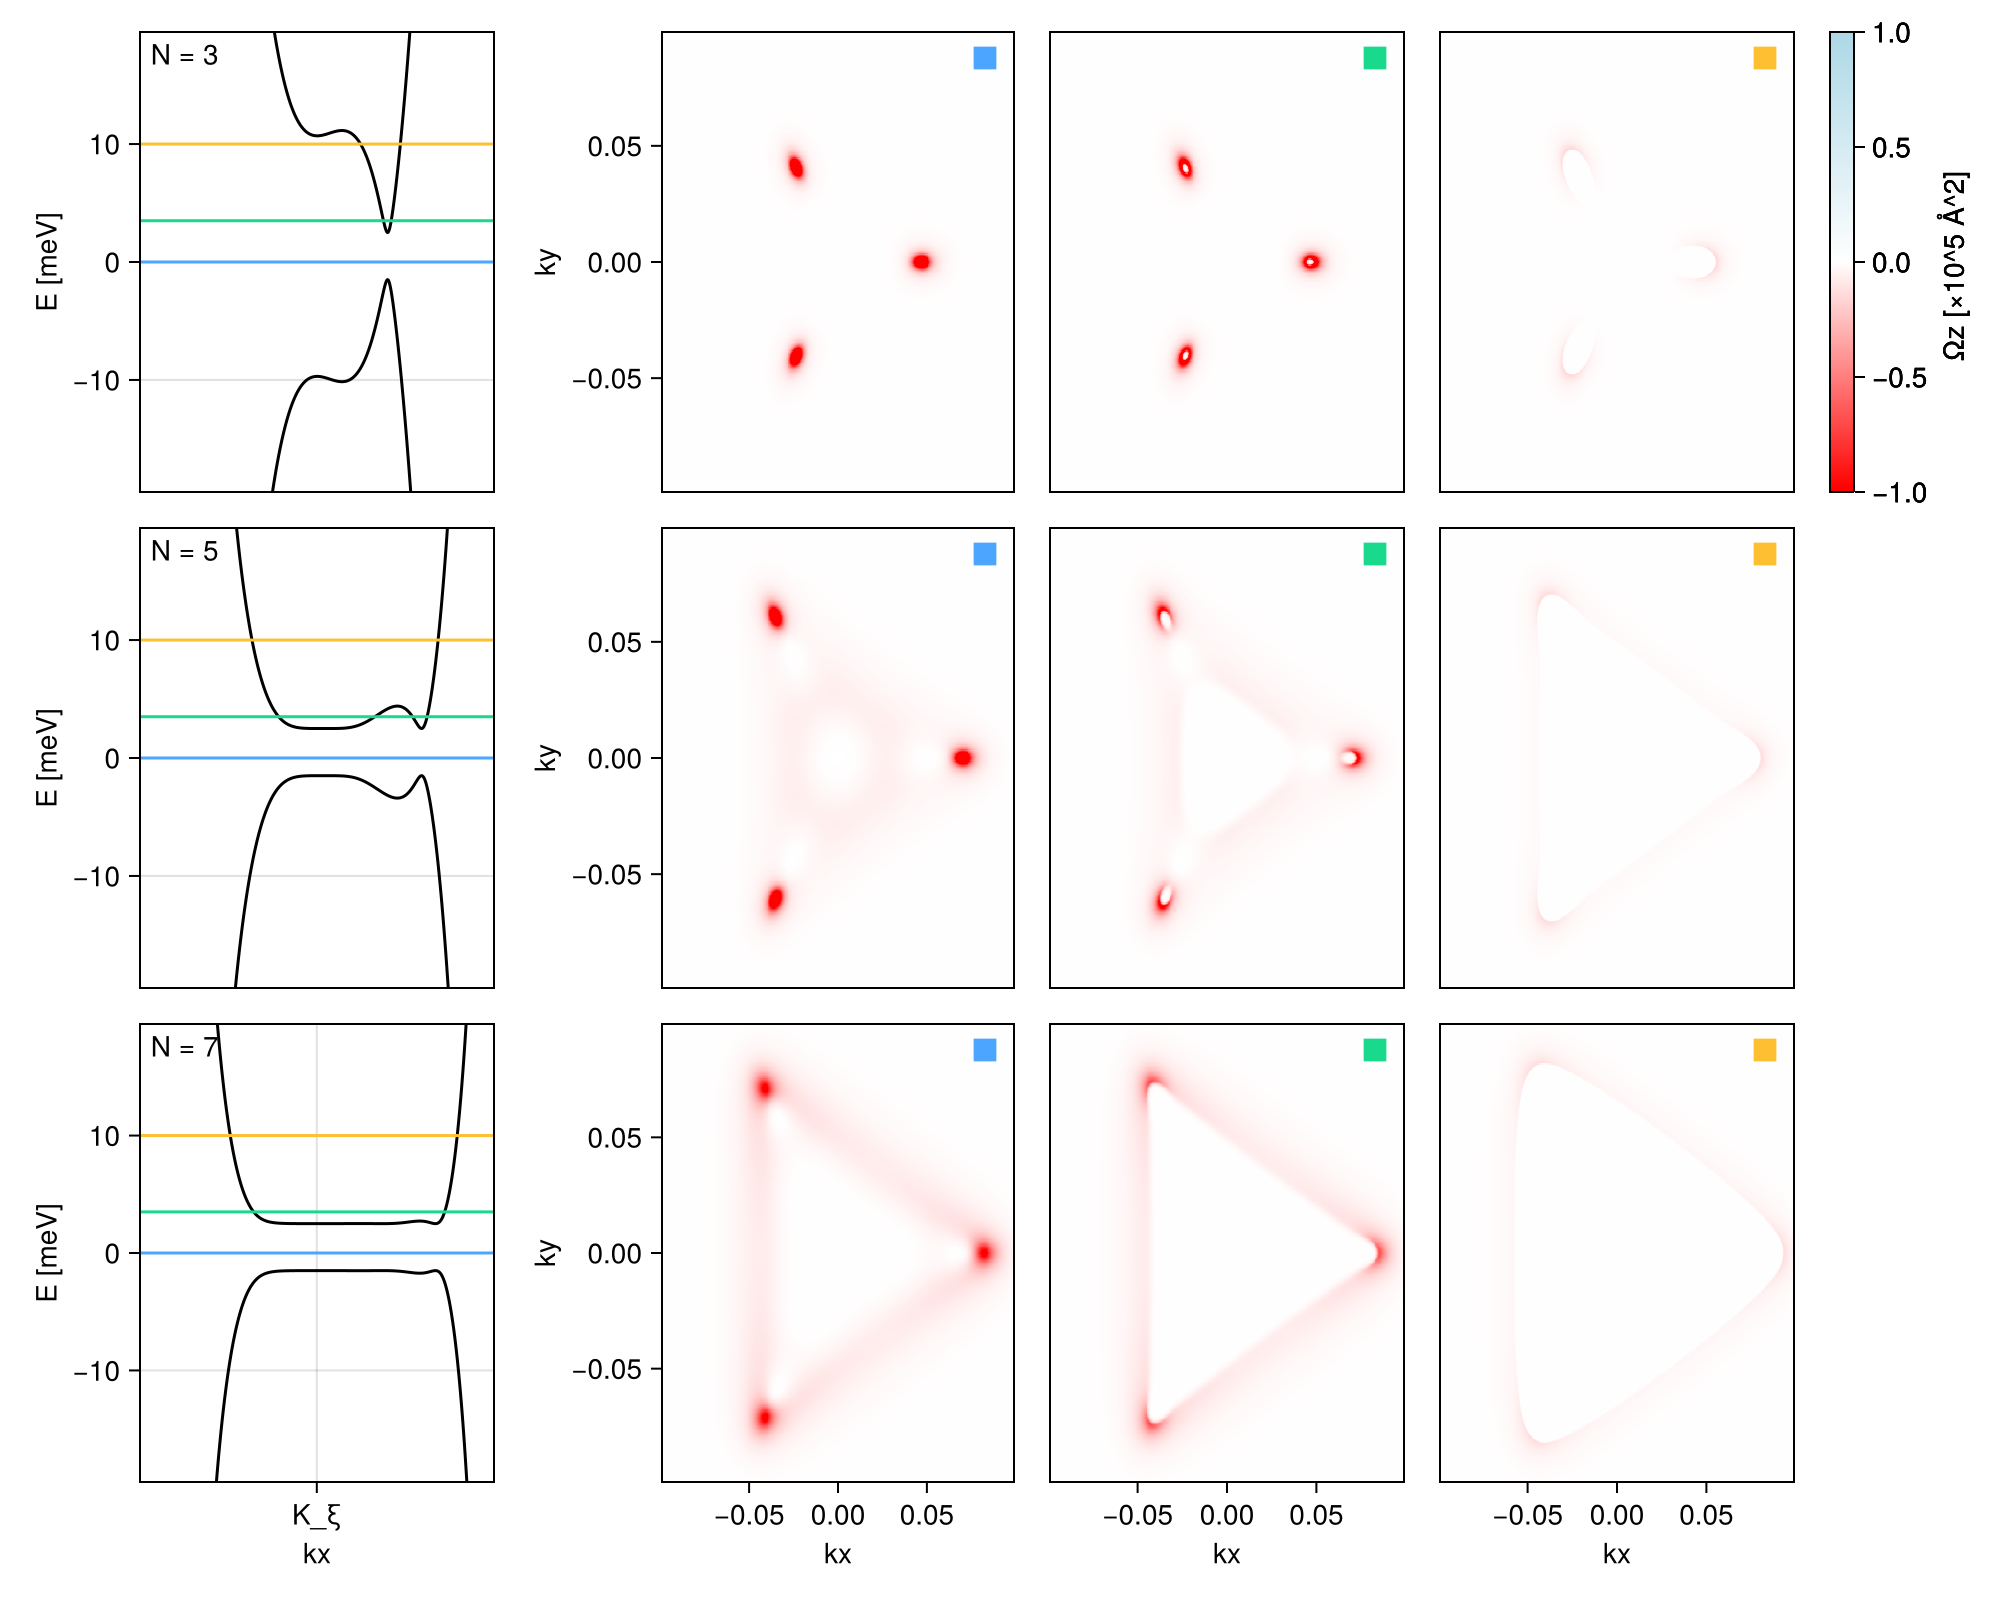

In [81]:
fig = figureΩzvsN(1, p, Nlist = [3,5,7] , μlist = [0,3.5,10], T = 2, points = 400, colrange = [-1,1] .* 1e5)

In [84]:
save(figures_folder * "Omegazkresolved.pdf", fig, px_per_unit = 4)

# px_per_unit = 3

CairoMakie.Screen{PDF}


### LMC contributions resolved

#### Extra

In [ ]:
lmcnoshift0p = lmcnoshift_presets(0,1)
q = [0,0.00000000]
ϵs, ψs = eigen(Matrix(lmcnoshift0p.h(q)))
dhh(q) = lmcnoshift0p.nabla_h(q)
dhx = dhh(q)[1]
dhy = dhh(q)[2]

Optics_in_the_length_gauge.k_linear_mr_integrand(:x,:x,:x, ϵs, ψs, lmcnoshift0p.rz(q, ψs), dh[1], dh[2], lmcnoshift0p.nabla_nabla_h(q), 2, 1;
Ω_contr = true, omm_contr = true, fermi_surface = false)     
using Arpack
    using LinearAlgebra
    using Cubature
    using ProgressMeter
    using Base.Threads
    using Distributed
    using Dierckx
    using PhysicalConstants
    using PhysicalConstants.CODATA2018
    using Unitful
    using SparseArrays
    using StaticArrays
    using Parameters

ang_to_m = 1e-10
const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
const ħ = PhysicalConstants.CODATA2018.ħ
const e = PhysicalConstants.CODATA2018.e
const C = ((e^3 / ħ^2) |> u"μA/V^2/s").val
const C_cd = ((e^2/ħ) |> u"μA/V").val
const ħ_ev_s = (ħ |> u"eV*s").val
i = :x;
j = i 
k = j
rz = lmcnoshift0p.rz(q, ψs)

omega = Optics_in_the_length_gauge.Ω(ϵs)
Δx = Optics_in_the_length_gauge.Δ(ψs, dhx) * ang_to_m
Δy = Optics_in_the_length_gauge.Δ(ψs, dhy) * ang_to_m
rx = Optics_in_the_length_gauge.r(ϵs, ψs, dhx) * ang_to_m
ry = Optics_in_the_length_gauge.r(ϵs, ψs, dhy) * ang_to_m
vx = Optics_in_the_length_gauge.vel(ψs, dhx) * ang_to_m/ ħ_ev_s
vy = Optics_in_the_length_gauge.vel(ψs, dhy) * ang_to_m/ ħ_ev_s
vi = Optics_in_the_length_gauge.which_mat(i, vx, vy)
vj = Optics_in_the_length_gauge.which_mat(j, vx, vy)
r_not_k = Optics_in_the_length_gauge.which_mat(k, ry, rx)
Optics_in_the_length_gauge.mr_Ω(:x,:x,:x, rz, rx, ry, vx, vy)